## Dont' be seduced by the siren song of correlation

Correlation doesn't mean causality, is one of the sentences that walk alongside of statistician, economist and data scientist, we can explore several funny spurios correlations, for instance, the divorce rat in Maine correlates with per capita consumption of margarine (r=0.992) or the numer of people who drowned by falling into a pool and Nicolas Cage films (r=0.666). So for this we need to be careful with correlation interpretations.

In [10]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [11]:
df = pd.read_csv('data/stand_data_icecream.csv')

In [12]:
df.head()

,icecream_sales,iced_coffee_sales,summer_months,temps
0,38519.423382,43753.760447,0,43.644356
1,51550.513488,48683.054378,0,48.650674
2,18711.099378,18062.256180,0,18.060331
3,2919.567424,2128.481363,0,2.128497
4,65966.136204,52225.660119,0,52.286859


[Text(0.5, 1.0, 'Correlation icecream sales against temperature ')]

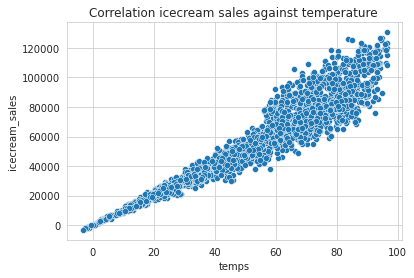

In [13]:
sns.set_style('whitegrid')
sns.scatterplot(x='temps', y='icecream_sales', data=df).set(title='Correlation icecream sales against temperature ')

In [17]:
corr,_ = pearsonr(df['temps'], df['icecream_sales'])
corr

0.9483198026276743

Temperature and ice cream have a correlation of 0.94, if we had the responsability to run an ice cream shop, and the weather forecasting say that the next winter will be will be atypical hotter, we probabliy to get carried away for the siren sing increasing our stock considerably.

### Biased model 

In [20]:
ols("icecream_sales ~ temps", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         icecream_sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.142e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:15:16   Log-Likelihood:                -25180.
No. Observations:                2400   AIC:                         5.036e+04
Df Residuals:                    2398   BIC:                         5.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4519.0554    454.566     -9.941      0.000   -5410.439   -3627.672
temps       1145.3197      7.826    146.348      0.000    1129.973    1160.666
==============================================================================
Omnibus:                      163.911   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.126
Skew:                           0.551   Prob(JB):                     8.00e-55
Kurtosis:                       4.131   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The temperature coeficient say us that for each additional grade up, ice cream sales increase by $1145, as I said before if we trust in this model, naturaly we increase our stock... but when the atipycal winter days arrive, we saw that our model doesn't work as suposed it.

### Correcting the model

Going in deep we can see that the months with higher sales are summer months, this coinceded with high temperature but also does with children summer break.  

In [22]:
ols("icecream_sales ~ temps + summer_months", 
          data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         icecream_sales   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 2.647e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:37:48   Log-Likelihood:                -24167.
No. Observations:                2400   AIC:                         4.834e+04
Df Residuals:                    2397   BIC:                         4.836e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.8783    308.914      0.071      0.944    -583.888     627.645
temps           998.6645      5.756    173.491      0.000     987.377    1009.952
summer_months  1.979e+04    351.171     56.344      0.000    1.91e+04    2.05e+04
==============================================================================
Omnibus:                       97.484   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.643
Skew:                           0.103   Prob(JB):                     1.55e-62
Kurtosis:                       4.675   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the summer days as a part of the model the sales for one more grade increased in 998, and when is a summer month we can hope for 19,790 in sales.